# 来⾃Transformers的双向编码器表⽰（BERT）
我们已经介绍了⼏种⽤于⾃然语⾔理解的词嵌⼊模型。在预训练之后，输出可以被认为是⼀个矩阵，其中每
⼀⾏都是⼀个表⽰预定义词表中词的向量。事实上，这些词嵌⼊模型都是与上下⽂⽆关的。让我们先来说明
这个性质。

## 从上下⽂⽆关到上下⽂敏感
回想⼀下 14.4节和 14.7节中的实验。例如，word2vec和GloVe都将相同的预训练向量分配给同⼀个词，⽽不
考虑词的上下⽂（如果有的话）。形式上，任何词元x的上下⽂⽆关表⽰是函数f(x)，其仅将x作为其输⼊。考
虑到⾃然语⾔中丰富的多义现象和复杂的语义，上下⽂⽆关表⽰具有明显的局限性。例如，在“a crane is
flying”（⼀只鹤在⻜）和“a crane driver came”（⼀名吊⻋司机来了）的上下⽂中，“crane”⼀词有完全不
同的含义；因此，同⼀个词可以根据上下⽂被赋予不同的表⽰。

这推动了“上下⽂敏感”词表⽰的发展，其中词的表征取决于它们的上下⽂。因此，词元x的上下⽂敏感表⽰是
函数f(x, c(x))，其取决于x及其上下⽂c(x)。流⾏的上下⽂敏感表⽰包括TagLM（language-model-augmented
sequence tagger，语⾔模型增强的序列标记器）(Peters et al., 2017)、CoVe（Context Vectors，上下⽂向量）
(McCann et al., 2017)和ELMo（Embeddings from Language Models，来⾃语⾔模型的嵌⼊）(Peters et al.,
2018)。

例如，通过将整个序列作为输⼊，ELMo是为输⼊序列中的每个单词分配⼀个表⽰的函数。具体来说，ELMo将
来⾃预训练的双向⻓短期记忆⽹络的所有中间层表⽰组合为输出表⽰。然后，ELMo的表⽰将作为附加特征
添加到下游任务的现有监督模型中，例如通过将ELMo的表⽰和现有模型中词元的原始表⽰（例如GloVe）连
结起来。⼀⽅⾯，在加⼊ELMo表⽰后，冻结了预训练的双向LSTM模型中的所有权重。另⼀⽅⾯，现有的监
督模型是专⻔为给定的任务定制的。利⽤当时不同任务的不同最佳模型，添加ELMo改进了六种⾃然语⾔处
理任务的技术⽔平：情感分析、⾃然语⾔推断、语义⻆⾊标注、共指消解、命名实体识别和问答。


## 从特定于任务到不可知任务
尽管ELMo显著改进了各种⾃然语⾔处理任务的解决⽅案，但每个解决⽅案仍然依赖于⼀个特定于任务的架
构。然⽽，为每⼀个⾃然语⾔处理任务设计⼀个特定的架构实际上并不是⼀件容易的事。GPT（Generative
Pre Training，⽣成式预训练）模型为上下⽂的敏感表⽰设计了通⽤的任务⽆关模型 (Radford et al., 2018)。
GPT建⽴在Transformer解码器的基础上，预训练了⼀个⽤于表⽰⽂本序列的语⾔模型。当将GPT应⽤于下游
任务时，语⾔模型的输出将被送到⼀个附加的线性输出层，以预测任务的标签。与ELMo冻结预训练模型的
参数不同，GPT在下游任务的监督学习过程中对预训练Transformer解码器中的所有参数进⾏微调。GPT在⾃
然语⾔推断、问答、句⼦相似性和分类等12项任务上进⾏了评估，并在对模型架构进⾏最⼩更改的情况下改
善了其中9项任务的最新⽔平。

然⽽，由于语⾔模型的⾃回归特性，GPT只能向前看（从左到右）。在“i went to the bank to deposit cash”（我
去银⾏存现⾦）和“i went to the bank to sit down”（我去河岸边坐下）的上下⽂中，由于“bank”对其左
边的上下⽂敏感，GPT将返回“bank”的相同表⽰，尽管它有不同的含义。

## BERT：把两个最好的结合起来
如我们所⻅，ELMo对上下⽂进⾏双向编码，但使⽤特定于任务的架构；⽽GPT是任务⽆关的，但是从左到右
编码上下⽂。BERT（来⾃Transformers的双向编码器表⽰）结合了这两个⽅⾯的优点。它对上下⽂进⾏双
向编码，并且对于⼤多数的⾃然语⾔处理任务 (Devlin et al., 2018)只需要最少的架构改变。通过使⽤预训练
的Transformer编码器，BERT能够基于其双向上下⽂表⽰任何词元。在下游任务的监督学习过程中，BERT在
两个⽅⾯与GPT相似。⾸先，BERT表⽰将被输⼊到⼀个添加的输出层中，根据任务的性质对模型架构进⾏最
⼩的更改，例如预测每个词元与预测整个序列。其次，对预训练Transformer编码器的所有参数进⾏微调，⽽
额外的输出层将从头开始训练。图14.8.1 描述了ELMo、GPT和BERT之间的差异。

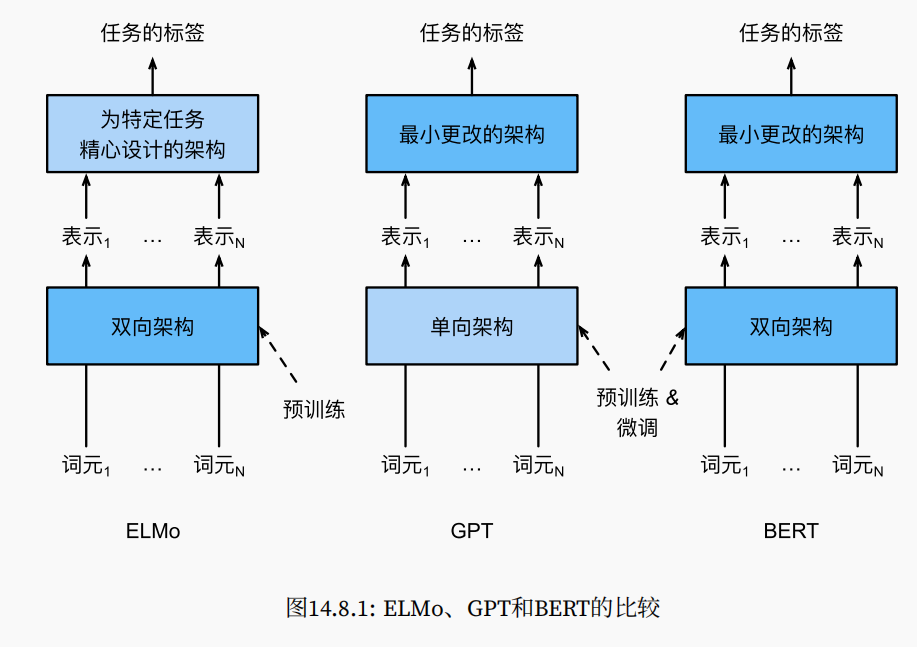

BERT进⼀步改进了11种⾃然语⾔处理任务的技术⽔平，这些任务分为以下⼏个⼤类：（1）单⼀⽂本分类（如
情感分析）、（2）⽂本对分类（如⾃然语⾔推断）、（3）问答、（4）⽂本标记（如命名实体识别）。从上下⽂敏
感的ELMo到任务不可知的GPT和BERT，它们都是在2018年提出的。概念上简单但经验上强⼤的⾃然语⾔深
度表⽰预训练已经彻底改变了各种⾃然语⾔处理任务的解决⽅案。

在本章的其余部分，我们将深⼊了解BERT的训练前准备。当在 15节中解释⾃然语⾔处理应⽤时，我们将说
明针对下游应⽤的BERT微调。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 输入表示
在⾃然语⾔处理中，有些任务（如情感分析）以单个⽂本作为输⼊，⽽有些任务（如⾃然语⾔推断）以⼀对
⽂本序列作为输⼊。BERT输⼊序列明确地表⽰单个⽂本和⽂本对。当输⼊为单个⽂本时，BERT输⼊序列是
特殊类别词元“<cls>”、⽂本序列的标记、以及特殊分隔词元“<sep>”的连结。当输⼊为⽂本对时，BERT输
⼊序列是“<cls>”、第⼀个⽂本序列的标记、“<sep>”、第⼆个⽂本序列标记、以及“<sep>”的连结。我们
将始终如⼀地将术语“BERT输⼊序列”与其他类型的“序列”区分开来。例如，⼀个BERT输⼊序列可以包
括⼀个⽂本序列或两个⽂本序列。

为了区分⽂本对，根据输⼊序列学到的⽚段嵌⼊eA和eB分别被添加到第⼀序列和第⼆序列的词元嵌⼊中。对
于单⽂本输⼊，仅使⽤eA。

下⾯的get_tokens_and_segments将⼀个句⼦或两个句⼦作为输⼊，然后返回BERT输⼊序列的标记及其相应
的⽚段索引。

In [2]:
#@save
def get_tokens_and_segments(tokens_a, tokens_b=None):
    """获取输⼊序列的词元及其⽚段索引"""
    tokens = ['<cls>'] + tokens_a + ['<sep>']
    # 0和1分别标记⽚段A和B
    segments = [0] * (len(tokens_a) + 2)
    if tokens_b is not None:
        tokens += tokens_b + ['<sep>']
        segments += [1] * (len(tokens_b) + 1)
    return tokens, segments

In [8]:
token_a=list("你好，世界")
token_b=list("Hlloe World")
tokens,segments=get_tokens_and_segments(token_a,token_b)
print(tokens)
print(segments)

['<cls>', '你', '好', '，', '世', '界', '<sep>', 'H', 'l', 'l', 'o', 'e', ' ', 'W', 'o', 'r', 'l', 'd', '<sep>']
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


BERT选择Transformer编码器作为其双向架构。在Transformer编码器中常⻅是，位置嵌⼊被加⼊到输⼊序
列的每个位置。然⽽，与原始的Transformer编码器不同，BERT使⽤可学习的位置嵌⼊。总之，图14.8.2表
明BERT输⼊序列的嵌⼊是词元嵌⼊、⽚段嵌⼊和位置嵌⼊的和。

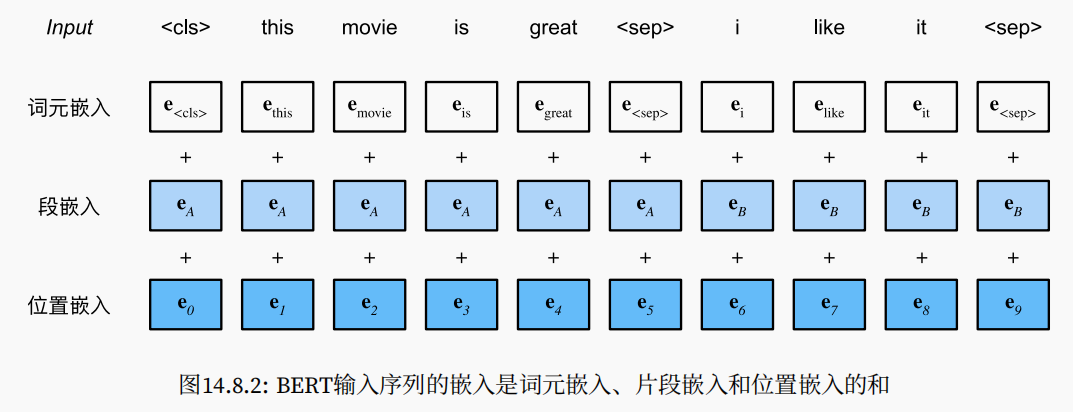

下⾯的BERTEncoder类类似于 10.7节中实现的TransformerEncoder类。与TransformerEncoder不同，BERTEncoder使⽤⽚段嵌⼊和可学习的位置嵌⼊。

In [3]:
#@save
class BERTEncoder(nn.Module):
    """BERT编码器"""
    def __init__(self, vocab_size, num_hiddens, norm_shape, ffn_num_input,
                 ffn_num_hiddens, num_heads, num_layers, dropout,
                 max_len=1000, key_size=768, query_size=768, value_size=768,
                 **kwargs):
        super(BERTEncoder, self).__init__(**kwargs)
        self.token_embedding = nn.Embedding(vocab_size, num_hiddens)
        self.segment_embedding = nn.Embedding(2, num_hiddens)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module(f"{i}", d2l.EncoderBlock(
                key_size, query_size, value_size, num_hiddens, norm_shape,
                ffn_num_input, ffn_num_hiddens, num_heads, dropout, True))
        # 在BERT中，位置嵌⼊是可学习的，因此我们创建⼀个⾜够⻓的位置嵌⼊参数
        self.pos_embedding = nn.Parameter(torch.randn(1, max_len,
        num_hiddens))
    
    def forward(self, tokens, segments, valid_lens):
        # 在以下代码段中，X的形状保持不变：（批量⼤⼩，最⼤序列⻓度，num_hiddens）
        X = self.token_embedding(tokens) + self.segment_embedding(segments)
        X = X + self.pos_embedding.data[:, :X.shape[1], :]
        for blk in self.blks:
            X = blk(X, valid_lens)
        return X

假设词表⼤⼩为10000，为了演⽰BERTEncoder的前向推断，让我们创建⼀个实例并初始化它的参数。

In [4]:
vocab_size, num_hiddens, ffn_num_hiddens, num_heads = 10000, 768, 1024, 4
norm_shape, ffn_num_input, num_layers, dropout = [768], 768, 2, 0.2
encoder = BERTEncoder(vocab_size, num_hiddens, norm_shape, ffn_num_input,
ffn_num_hiddens, num_heads, num_layers, dropout)

我们将tokens定义为⻓度为8的2个输⼊序列，其中每个词元是词表的索引。使⽤输⼊tokens的BERTEncoder的
前向推断返回编码结果，其中每个词元由向量表⽰，其⻓度由超参数num_hiddens定义。此超参数通常称
为Transformer编码器的隐藏⼤⼩（隐藏单元数）。

In [9]:
tokens = torch.randint(0, vocab_size, (2, 8))
segments = torch.tensor([[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1]])
print("tokens",tokens)
encoded_X = encoder(tokens, segments, None)
encoded_X.shape

tokens tensor([[5057, 9926, 9554, 8141, 3775, 6332, 2224, 6403],
        [5478, 1223, 9931, 7389, 1471, 1137, 7821, 3972]])


torch.Size([2, 8, 768])

## 预训练任务
BERTEncoder的前向推断给出了输⼊⽂本的每个词元和插⼊的特殊标记“<cls>”及“<seq>”的BERT表⽰。接
下来，我们将使⽤这些表⽰来计算预训练BERT的损失函数。预训练包括以下两个任务：掩蔽语⾔模型和下⼀
句预测。

### 掩码语言模型(Masked Language Modeling)
如 8.3节所⽰，语⾔模型使⽤左侧的上下⽂预测词元。为了双向编码上下⽂以表⽰每个词元，BERT随机掩蔽
词元并使⽤来⾃双向上下⽂的词元以⾃监督的⽅式预测掩蔽词元。此任务称为掩蔽语⾔模型。

如 8.3节所⽰，语⾔模型使⽤左侧的上下⽂预测词元。为了双向编码上下⽂以表⽰每个词元，BERT随机掩蔽
词元并使⽤来⾃双向上下⽂的词元以⾃监督的⽅式预测掩蔽词元。此任务称为掩蔽语⾔模型。
在这个预训练任务中，将随机选择15%的词元作为预测的掩蔽词元。要预测⼀个掩蔽词元⽽不使⽤标签作弊，
⼀个简单的⽅法是总是⽤⼀个特殊的“<mask>”替换输⼊序列中的词元。然⽽，⼈造特殊词元“<mask>”不
会出现在微调中。为了避免预训练和微调之间的这种不匹配，如果为预测⽽屏蔽词元（例如，在“this movie
is great”中选择掩蔽和预测“great”），则在输⼊中将其替换为：

* 80%时间为特殊的“<mask>“词元（例如，“this movie is great”变为“this movie is<mask>”；
* 10%时间为随机词元（例如，“this movie is great”变为“this movie is drink”）；
* 10%时间内为不变的标签词元（例如，“this movie is great”变为“this movie is great”）。

请注意，在15%的时间中，有10%的时间插⼊了随机词元。这种偶然的噪声⿎励BERT在其双向上下⽂编码中
不那么偏向于掩蔽词元（尤其是当标签词元保持不变时）。

我们实现了下⾯的MaskLM类来预测BERT预训练的掩蔽语⾔模型任务中的掩蔽标记。预测使⽤单隐藏层的多
层感知机（self.mlp）。在前向推断中，它需要两个输⼊：BERTEncoder的编码结果和⽤于预测的词元位置。输
出是这些位置的预测结果。

In [11]:
#@save
class MaskLM(nn.Module):
    """BERT的掩蔽语⾔模型任务"""
    def __init__(self, vocab_size, num_hiddens, num_inputs=768, **kwargs):
        super(MaskLM, self).__init__(**kwargs)
        self.mlp = nn.Sequential(nn.Linear(num_inputs, num_hiddens),
                                 nn.ReLU(),
                                 nn.LayerNorm(num_hiddens),
                                 nn.Linear(num_hiddens, vocab_size))

    def forward(self, X, pred_positions):
        num_pred_positions = pred_positions.shape[1]
        pred_positions = pred_positions.reshape(-1)
        batch_size = X.shape[0]
        batch_idx = torch.arange(0, batch_size)
        # 假设batch_size=2，num_pred_positions=3
        # 那么batch_idx是np.array（[0,0,0,1,1,1]）
        batch_idx = torch.repeat_interleave(batch_idx, num_pred_positions)
        masked_X = X[batch_idx, pred_positions]
        masked_X = masked_X.reshape((batch_size, num_pred_positions, -1))
        mlm_Y_hat = self.mlp(masked_X)
        return mlm_Y_hat

为了演⽰MaskLM的前向推断，我们创建了其实例mlm并对其进⾏了初始化。回想⼀下，来⾃BERTEncoder的正
向推断encoded_X表⽰2个BERT输⼊序列。我们将mlm_positions定义为在encoded_X的任⼀输⼊序列中预测
的3个指⽰。mlm的前向推断返回encoded_X的所有掩蔽位置mlm_positions处的预测结果mlm_Y_hat。对于每个
预测，结果的⼤⼩等于词表的⼤⼩。

In [12]:
mlm = MaskLM(vocab_size, num_hiddens)
mlm_positions = torch.tensor([[1, 5, 2], [6, 1, 5]])
mlm_Y_hat = mlm(encoded_X, mlm_positions)
mlm_Y_hat.shape

torch.Size([2, 3, 10000])

通过掩码下的预测词元mlm_Y的真实标签mlm_Y_hat，我们可以计算在BERT预训练中的遮蔽语⾔模型任务的
交叉熵损失。

In [13]:
mlm_Y = torch.tensor([[7, 8, 9], [10, 20, 30]])
loss = nn.CrossEntropyLoss(reduction='none')
mlm_l = loss(mlm_Y_hat.reshape((-1, vocab_size)), mlm_Y.reshape(-1))
mlm_l.shape

torch.Size([6])

### 下⼀句预测（Next Sentence Prediction）
尽管掩蔽语⾔建模能够编码双向上下⽂来表⽰单词，但它不能显式地建模⽂本对之间的逻辑关系。为了帮助
理解两个⽂本序列之间的关系，BERT在预训练中考虑了⼀个⼆元分类任务——下⼀句预测。在为预训练⽣成
句⼦对时，有⼀半的时间它们确实是标签为“真”的连续句⼦；在另⼀半的时间⾥，第⼆个句⼦是从语料库
中随机抽取的，标记为“假”。

下⾯的NextSentencePred类使⽤单隐藏层的多层感知机来预测第⼆个句⼦是否是BERT输⼊序列中第⼀个句
⼦的下⼀个句⼦。由于Transformer编码器中的⾃注意⼒，特殊词元“<cls>”的BERT表⽰已经对输⼊的两个
句⼦进⾏了编码。因此，多层感知机分类器的输出层（self.output）以X作为输⼊，其中X是多层感知机隐藏
层的输出，⽽MLP隐藏层的输⼊是编码后的“<cls>”词元。

In [14]:
#@save
class NextSentencePred(nn.Module):
    """BERT的下⼀句预测任务"""
    def __init__(self, num_inputs, **kwargs):
        super(NextSentencePred, self).__init__(**kwargs)
        self.output = nn.Linear(num_inputs, 2)
    
    def forward(self, X):
        # X的形状：(batchsize,num_hiddens)
        return self.output(X)

可以看到，NextSentencePred实例的前向推断返回每个BERT输⼊序列的⼆分类预测。

In [15]:
encoded_X = torch.flatten(encoded_X, start_dim=1)
# NSP的输⼊形状:(batchsize，num_hiddens)
nsp = NextSentencePred(encoded_X.shape[-1])
nsp_Y_hat = nsp(encoded_X)
nsp_Y_hat.shape

torch.Size([2, 2])

In [16]:
# 还可以计算两个⼆元分类的交叉熵损失。
nsp_y = torch.tensor([0, 1])
nsp_l = loss(nsp_Y_hat, nsp_y)
nsp_l.shape

torch.Size([2])

值得注意的是，上述两个预训练任务中的所有标签都可以从预训练语料库中获得，⽽⽆需⼈⼯标注。原始
的BERT已经在图书语料库 (Zhu et al., 2015)和英⽂维基百科的连接上进⾏了预训练。这两个⽂本语料库⾮常
庞⼤：它们分别有8亿个单词和25亿个单词。

## 整合代码
在预训练BERT时，最终的损失函数是掩蔽语⾔模型损失函数和下⼀句预测损失函数的线性组合。现在我们
可以通过实例化三个类BERTEncoder、MaskLM和NextSentencePred来定义BERTModel类。前向推断返回编码后
的BERT表⽰encoded_X、掩蔽语⾔模型预测mlm_Y_hat和下⼀句预测nsp_Y_hat。

In [17]:
#@save
class BERTModel(nn.Module):
    """BERT模型"""
    def __init__(self, vocab_size, num_hiddens, norm_shape, ffn_num_input,
                 ffn_num_hiddens, num_heads, num_layers, dropout,
                 max_len=1000, key_size=768, query_size=768, value_size=768,
                 hid_in_features=768, mlm_in_features=768,
                 nsp_in_features=768):
        super(BERTModel, self).__init__()
        self.encoder = BERTEncoder(vocab_size, num_hiddens, norm_shape,
                                   ffn_num_input, ffn_num_hiddens, num_heads, num_layers,
                                   dropout, max_len=max_len, key_size=key_size,
                                   query_size=query_size, value_size=value_size)
        self.hidden = nn.Sequential(nn.Linear(hid_in_features, num_hiddens),
                                    nn.Tanh())
        self.mlm = MaskLM(vocab_size, num_hiddens, mlm_in_features)
        self.nsp = NextSentencePred(nsp_in_features)
        
    def forward(self, tokens, segments, valid_lens=None,
                pred_positions=None):
        encoded_X = self.encoder(tokens, segments, valid_lens)
        if pred_positions is not None:
            mlm_Y_hat = self.mlm(encoded_X, pred_positions)
        else:
            mlm_Y_hat = None
        # ⽤于下⼀句预测的多层感知机分类器的隐藏层，0是“<cls>”标记的索引
        nsp_Y_hat = self.nsp(self.hidden(encoded_X[:, 0, :]))
        return encoded_X, mlm_Y_hat, nsp_Y_hat

## 小结
* word2vec和GloVe等词嵌⼊模型与上下⽂⽆关。它们将相同的预训练向量赋给同⼀个词，⽽不考虑词的上下⽂（如果有的话）。它们很难处理好⾃然语⾔中的⼀词多义或复杂语义。
* 对于上下⽂敏感的词表⽰，如ELMo和GPT，词的表⽰依赖于它们的上下⽂。
* ELMo对上下⽂进⾏双向编码，但使⽤特定于任务的架构（然⽽，为每个⾃然语⾔处理任务设计⼀个特定的体系架构实际上并不容易）；⽽GPT是任务⽆关的，但是从左到右编码上下⽂。
* BERT结合了这两个⽅⾯的优点：它对上下⽂进⾏双向编码，并且需要对⼤量⾃然语⾔处理任务进⾏最⼩的架构更改。
* BERT输⼊序列的嵌⼊是词元嵌⼊、⽚段嵌⼊和位置嵌⼊的和。
* 预训练包括两个任务：掩蔽语⾔模型和下⼀句预测。前者能够编码双向上下⽂来表⽰单词，⽽后者则显式地建模⽂本对之间的逻辑关系。